In [15]:
import numpy as np
import logging 
import time 
from datetime import datetime
import json
from pathlib import Path

from src import ParameterSet, Plot
from src import ModelBase as Model
from src.integral import itoint

from src.model_base import ModelBase
import matplotlib.pyplot as plt

# np.seterr(all='raise')
np.set_printoptions(precision=4, suppress=True, linewidth=200)
logging.basicConfig(level=logging.WARN)


In [16]:
def run(t_end, changes = {}, *, dt=0.0005, path:Path=None):
    #print(f'estimated time: {1.1 * t_end/dt / 1000} seconds')
    t_start = time.time()
    t = np.linspace(0, t_end, int(t_end / dt) + 1)
    y0 = Model()
    y0.initialize()
    #params = ParameterSet("structure.json")
    params = ParameterSet("smallcirtuit.json")
    params.batch_update(changes)
    #params.J.print_matrix()
    #params.J_ampa.print_matrix()
    #print(json.dumps(params.__flat_json__(ignore_zeros=True), indent=2))
    if path is not None:
        params.save(path / 'params.json')
        params.saveDelta(path / 'params_delta.json',base_file='structure.json')
        params.saveDeltaHtml(path / 'params_delta.html',base_file='structure.json')
        params.saveHtml(path / 'params.html',keys = [])

    def calc_g_static():
      sigma = y0.serialize_g(params)
      g_vector = sigma * params.constants.tau_y
      g_matrix = np.diag(g_vector)
      g_matrix = g_matrix[:,~np.all(g_matrix == 0, axis=0)]
      g_matrix = g_matrix * 1.0
      return g_matrix
    
    g_matrix = calc_g_static()

    def model_f(y, t):
        Y = Model().deserialize(y)
        delta = Y.calcDelta(t, params)
        dy = delta.serialize()
        return dy

    def model_g(y, t):
        # Y = MyState().deserialize(y)
        # sigma = Y.serialize_g(params)
        # tau_y = params.constants.tau_y
        # g = sigma * tau_y
        # return np.diag(g_vector)
        return g_matrix.copy()

    # gen = np.random.Generator(np.random.PCG64(123))
    gen = None
    # res = sdeint.itoint(model_f, model_g, y0.serialize(), t, gen)
    res = itoint(model_f, model_g, y0.serialize(), t, gen)
    def toState(y): return Model().deserialize(y)
    t_end = time.time()
    #print(f'elapsed time: {t_end - t_start} seconds')
    return t, list(map(toState, res))

In [3]:
dt = datetime.now()
exp="fft"
folder = Path(f'img/{exp}/{dt.strftime("%Y-%m-%d")}/{dt.strftime("%H%M%S")}')
folder.mkdir(parents=True)

C:\Users\palavia\AppData\Local\Temp\ipykernel_8412\1804667518.py:8: ResourceWarning: unclosed file <_io.TextIOWrapper name='smallcirtuit.json' mode='r' encoding='cp1252'>
  params = ParameterSet("smallcirtuit.json")
c:\Users\palavia\neural-simulation\src\param.py:69: ResourceWarning: unclosed file <_io.TextIOWrapper name='structure.json' mode='r' encoding='cp1252'>
  base = ParameterSet(base_file).__flat_json__()


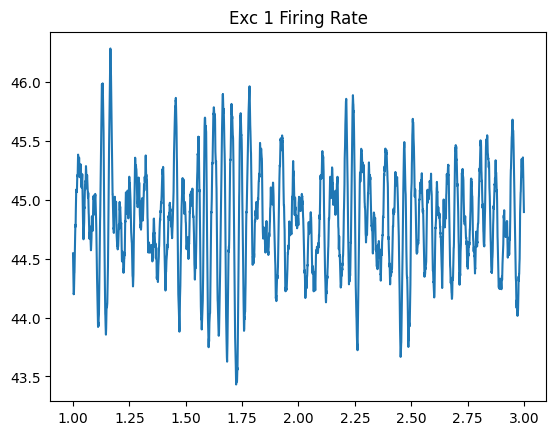

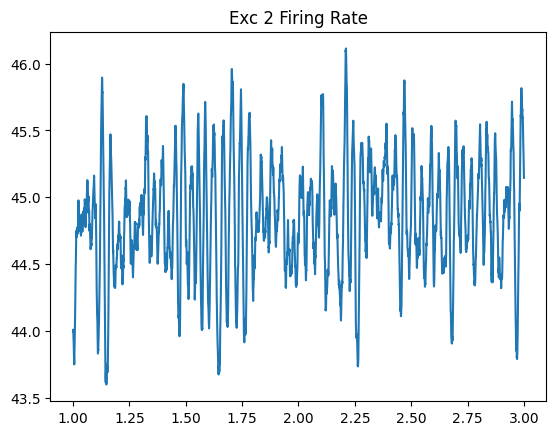

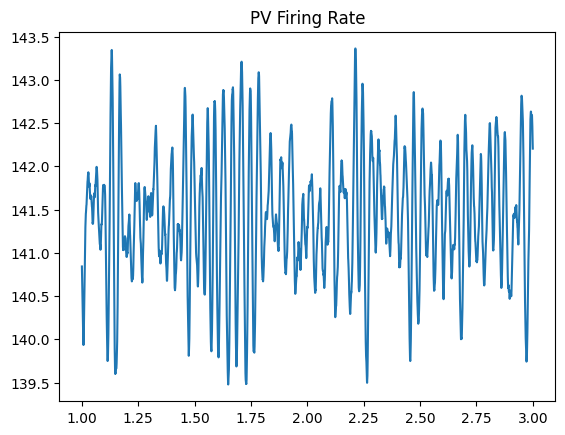

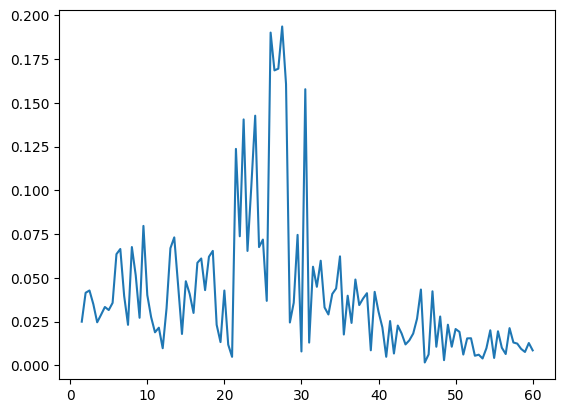

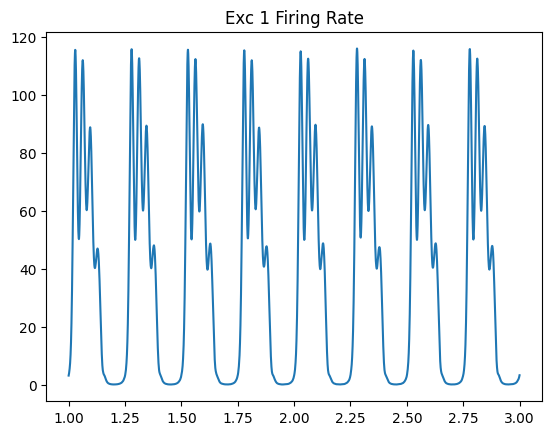

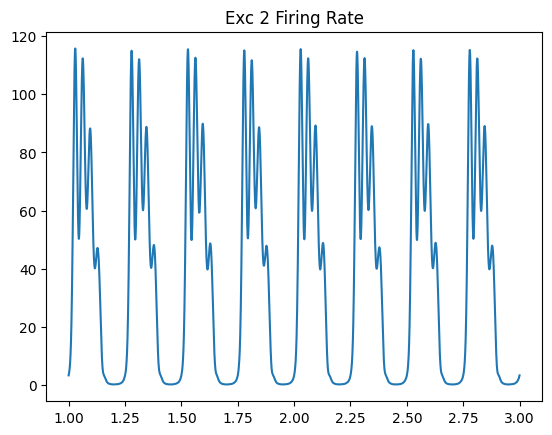

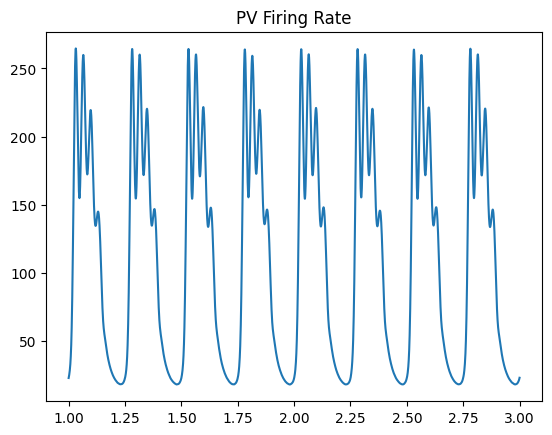

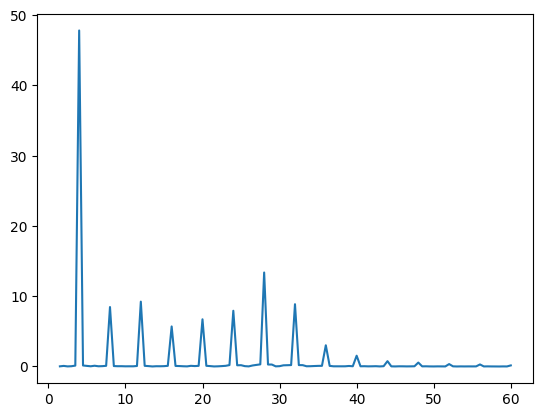

In [4]:
plots=[]
i = 0.42
experiment = {"exc1.I_back.dc": i, "exc2.I_back.dc": i}
t, res = run(3, changes = experiment , dt=0.0005, path=folder)
plots=[Plot(['exc1.r'], t_start=1, t_end=30, title='Exc 1 Firing Rate'),
       Plot(['exc2.r'], t_start=1, t_end=30, title='Exc 2 Firing Rate' ),
       Plot(['pv.r'], t_start=1, t_end=30, title='PV Firing Rate'),
    Plot(['exc1.r'], t_start=1, t_end=30, title='Exc 1 FFT',plot_type= "fft")
]


for p in plots:
    if p.plot_type == "fft":
        p(t,res,max_fq = 60)
        plt.show()
    else:
        p(t,res)
        plt.show()
i = 0.42
experiment = {"exc1.I_back.dc": i, "exc2.I_back.dc": i, "exc1.I_back.amplitude":0.1, "exc2.I_back.amplitude":0.1}
t, res = run(3, changes = experiment , dt=0.0005, path=folder)
plots =[
       Plot(['exc1.r'], t_start=1, t_end=30, title='Exc 1 Firing Rate'),
       Plot(['exc2.r'], t_start=1, t_end=30, title='Exc 2 Firing Rate' ),
       Plot(['pv.r'], t_start=1, t_end=30, title='PV Firing Rate'),
    Plot(['exc1.r'], t_start=1, t_end=30, title='EXC1 FFT',plot_type= "fft")
]


for p in plots:
    if p.plot_type == "fft":
        p(t,res,max_fq = 60)
        plt.show()
    else:
        p(t,res)
        plt.show()

C:\Users\palavia\AppData\Local\Temp\ipykernel_3020\1804667518.py:8: ResourceWarning: unclosed file <_io.TextIOWrapper name='smallcirtuit.json' mode='r' encoding='cp1252'>
  params = ParameterSet("smallcirtuit.json")


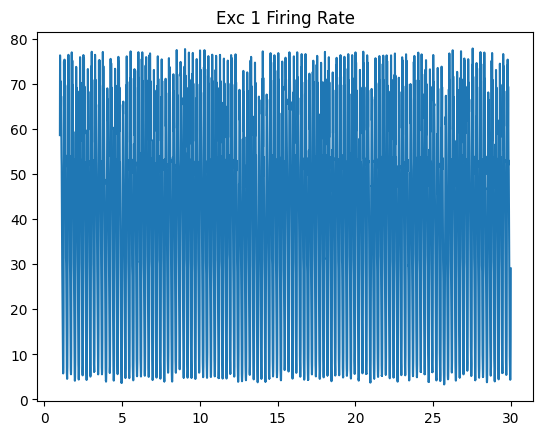

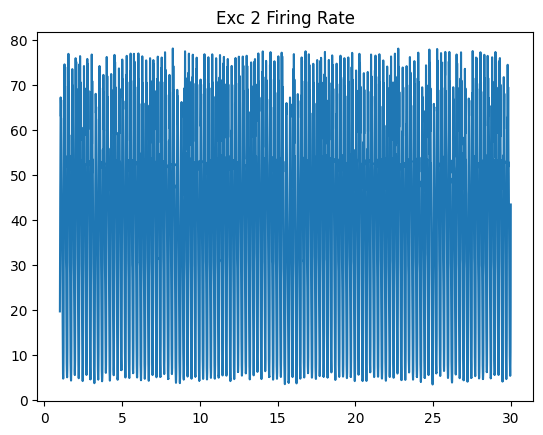

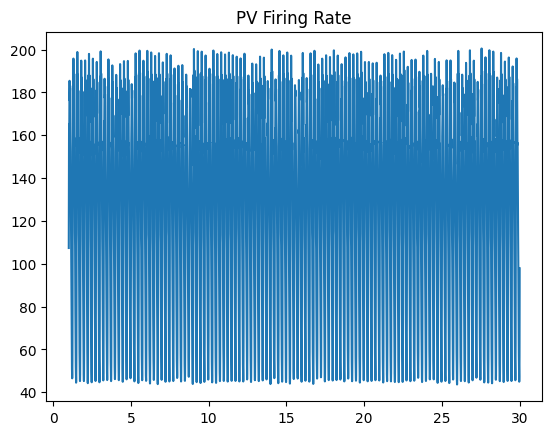

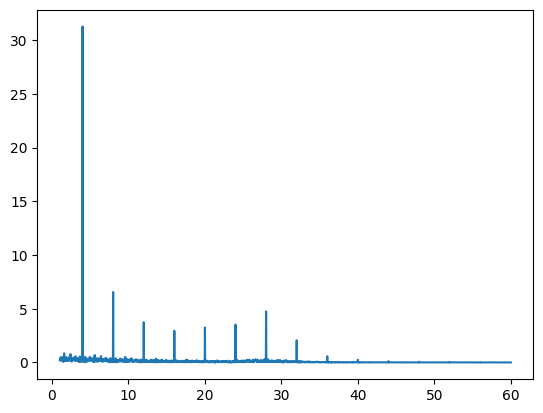

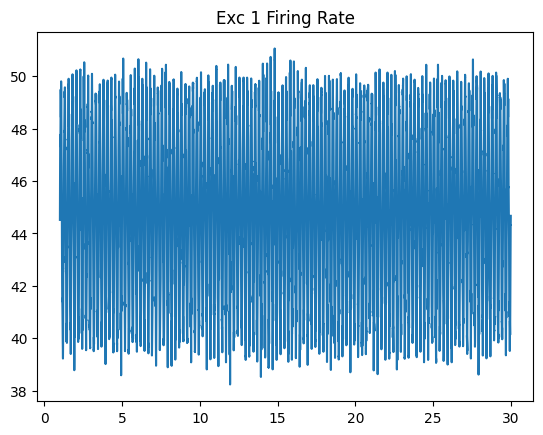

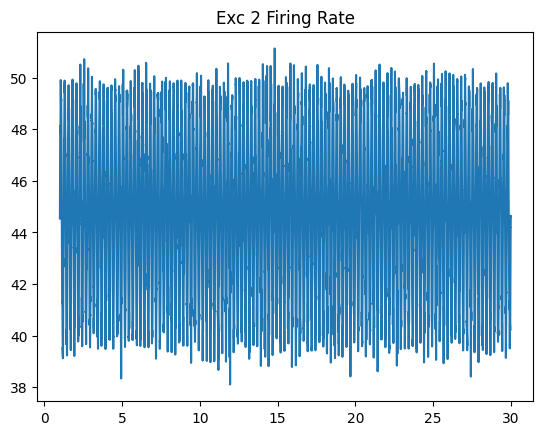

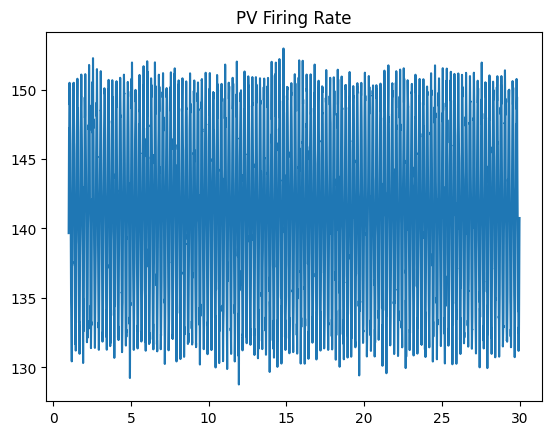

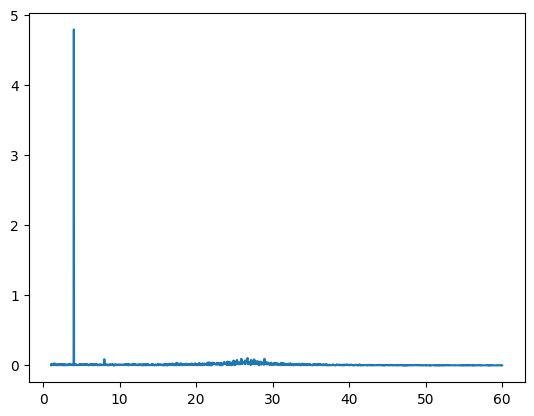

In [8]:
plots=[]
i = 0.42
experiment = {"exc1.I_back.dc": i, "exc2.I_back.dc": i,"exc1.I_back.amplitude":0.05, "exc2.I_back.amplitude":0.05}
t, res = run(30, changes = experiment , dt=0.0005, path=folder)
plots=[Plot(['exc1.r'], t_start=1, t_end=30, title='Exc 1 Firing Rate'),
       Plot(['exc2.r'], t_start=1, t_end=30, title='Exc 2 Firing Rate' ),
       Plot(['pv.r'], t_start=1, t_end=30, title='PV Firing Rate'),
    Plot(['exc1.r'], t_start=1, t_end=30, title='Exc 1 FFT',plot_type= "fft")
]


for p in plots:
    if p.plot_type == "fft":
        p(t,res,max_fq = 60)
        plt.show()
    else:
        p(t,res)
        plt.show()
i = 0.42
experiment = {"exc1.I_back.dc": i, "exc2.I_back.dc": i, "exc1.I_back.amplitude":0.01, "exc2.I_back.amplitude":0.01}
t, res = run(30, changes = experiment , dt=0.0005, path=folder)
plots =[
       Plot(['exc1.r'], t_start=1, t_end=30, title='Exc 1 Firing Rate'),
       Plot(['exc2.r'], t_start=1, t_end=30, title='Exc 2 Firing Rate' ),
       Plot(['pv.r'], t_start=1, t_end=30, title='PV Firing Rate'),
    Plot(['exc1.r'], t_start=1, t_end=30, title='EXC1 FFT',plot_type= "fft")
]


for p in plots:
    if p.plot_type == "fft":
        p(t,res,max_fq = 60)
        plt.show()
    else:
        p(t,res)
        plt.show()

In [49]:
i = 0.3
experiment = {"exc1.I_back.dc": i, "exc2.I_back.dc": i}
t, res = run(60, changes = experiment , dt=0.0005, path=folder)
obj = Plot(['exc1.r'], t_start=1, t_end=60, title='Exc 1 Firing Rate', file=folder / 'r1.svg')
(t_base, traces_base) = obj.get_traces(t, res)

signal_base = np.array(traces_base[0])
fourier_base = np.fft.fft(signal_base)
ps_base = np.abs(np.fft.fft(signal_base))**2
N= signal_base.size
dt = t_base[1]-t_base[0]
freqs = np.fft.fftfreq(N, dt)
# remove the DC bin because 1/f cannot fit at 0 Hz
ps_base = ps_base[freqs != 0]
fourier_base = fourier_base[freqs !=0]
freqs = freqs[freqs != 0]
idx = np.argsort(freqs)

i = 0.45
experiment = {"exc1.I_back.dc": i, "exc2.I_back.dc": i}
t, res = run(60, changes = experiment , dt=0.0005, path=folder)
obj = Plot(['exc1.r'], t_start=1, t_end=60, title='Exc 1 Firing Rate', file=folder / 'r1.svg')
(t, traces) = obj.get_traces(t, res)

signal = np.array(traces[0])
fourier = np.fft.fft(signal)
ps = np.abs(np.fft.fft(signal))**2
dt = t[1]-t[0]
freqs = np.fft.fftfreq(N, dt)
# remove the DC bin because 1/f cannot fit at 0 Hz
ps = ps[freqs != 0]
fourier = fourier[freqs !=0]
freqs = freqs[freqs != 0]
idx2 = np.argsort(freqs)


C:\Users\palavia\AppData\Local\Temp\ipykernel_17224\1804667518.py:8: ResourceWarning: unclosed file <_io.TextIOWrapper name='smallcirtuit.json' mode='r' encoding='cp1252'>
  params = ParameterSet("smallcirtuit.json")
c:\Users\palavia\neural-simulation\src\param.py:69: ResourceWarning: unclosed file <_io.TextIOWrapper name='structure.json' mode='r' encoding='cp1252'>
  base = ParameterSet(base_file).__flat_json__()


Text(0, 0.5, 'Power')

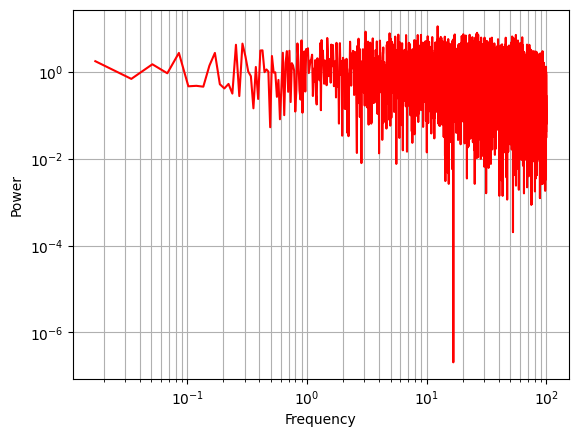

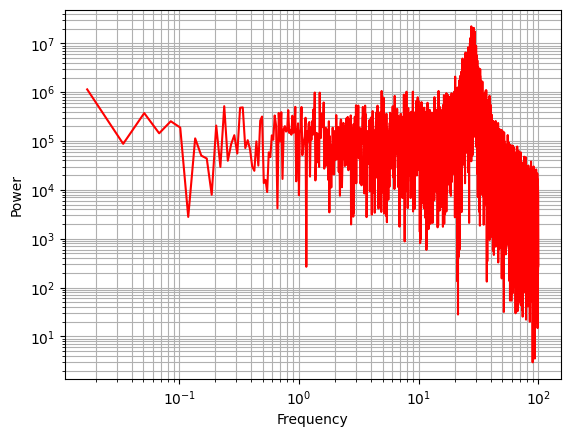

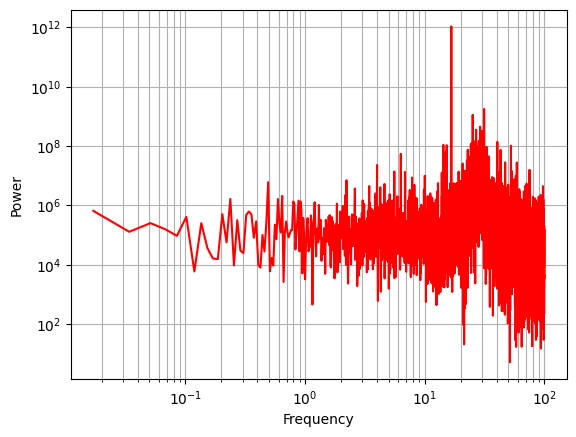

In [52]:
p_norm = 10*np.log10(ps/ps_base)
idx = np.where((freqs<=100)& (freqs>=0))

# plt.plot(freqs[idx], ps_base[idx])
# plt.xlabel("Frequency")
# plt.ylabel("Power")
# plt.show()
# plt.plot(freqs[idx], ps[idx])
# plt.xlabel("Frequency")
# plt.ylabel("Power")
# plt.show()
# plt.plot(freqs[idx], (p_norm[idx]))
# plt.xlabel("Frequency")
# plt.ylabel("Power")
# plt.show()


fig,ax=plt.subplots()
ax.plot(freqs[idx], ps_base[idx],color='red',label='data1')
plt.grid(True, which="both")
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel("Frequency")
plt.ylabel("Power")

fig,ax=plt.subplots()
ax.plot(freqs[idx], ps[idx],color='red',label='data1')
plt.grid(True, which="both")
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel("Frequency")
plt.ylabel("Power")


p_norm = (ps/ps_base)

fig,ax=plt.subplots()
ax.plot(freqs[idx], p_norm[idx],color='red',label='data1')
plt.grid(True, which="both")
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel("Frequency")
plt.ylabel("Power")

In [21]:
sum(idx == idx2)

118000

In [22]:
len(idx)

118000

In [5]:
experiments=[{"exc1.I_back.dc": 0.42 "exc2.I_back.dc": 0.42},{"exc1.I_back.dc": 0.5 "exc2.I_back.dc": 0.5}]
if __name__ == '__main__':
    exp = 'start_over'
    for experiment in experiments:
        print(experiment)
        dt = datetime.now()
        folder = Path(f'img/{exp}/{dt.strftime("%Y-%m-%d")}/{dt.strftime("%H%M%S")}')
        #folder = Path(f'img/{exp}/{dt.strftime("%Y-%m-%d")}/highampa_theta')
        folder.mkdir(parents=True)
        t, res = run(30, changes = experiment , dt=0.0005, path=folder)
        #exc1_r = np.array([x.exc1.r for x in res])
        plots = [
            Plot(['exc1.r'], t_start=1, t_end=30, title='Exc 1 Firing Rate', file=folder / 'r1.svg'),
            Plot(['exc2.r'], t_start=1, t_end=30, title='Exc 2 Firing Rate', file=folder / 'r2.svg'),
            Plot(['pv.r'],   t_start=1, t_end=30, title='PV Firing Rate',    file=folder / 'pv.svg'),
            #Plot(['sst1.r'], t_start=1, t_end=30, title='SST 1 Firing Rate', file=folder / 's1.svg'),
            #Plot(['sst2.r'], t_start=1, t_end=30, title='SST 2 Firing Rate', file=folder / 's2.svg'),
            #Plot(['vip1.r'], t_start=1, t_end=30, title='VIP 1 Firing Rate', file=folder / 'v1.svg'),
            #Plot(['vip2.r'], t_start=1, t_end=30, title='VIP 2 Firing Rate', file=folder / 'v2.svg'),
            #Plot(['exc1.r'], t_start=0, t_end=10, title='Exc 1 PAC', file=folder / 'pac.svg',plot_type= "pac"),
            Plot(['exc1.r'], t_start=1, t_end=30, title='Exc 1 fft no transient', file=folder / 'fft.svg',plot_type= "fft"),
            #Plot(['exc1.r'], t_start=0.0, t_end=10, title='Exc 1 fft', file=folder / 'fft.svg',plot_type= "fft"),
            #Plot(['exc1.r'], t_start=9.5, t_end=10, title='Exc 1 fft', file=folder / 'fft.svg',plot_type= "fft"),
            #Plot(['exc1.r'], t_start=2, t_end=3, title='Exc 1 Firing Rate', file=folder / 'r1-before.svg'),
            # Plot(['exc1.r'], t_start=5, t_end=6, title='Exc 1 Firing Rate', file=f'{folder}/r1-during.png'),
            # Plot(['exc1.r'], t_start=7, t_end=8, title='Exc 1 Firing Rate', file=f'{folder}/r1-after.png'),
            # Plot(['exc1.r','exc2.r','pv.r'], t_start=3, t_end=7, title='Exc 1, 2, PV Firing Rate', file=f'{folder}/r1-r2.png'),
        ]
        for p in plots:
            if p.plot_type == "fft":
                p(t,res,max_fq = 50)
            else:
                p(t,res)
        plots_ref = [p.file.name for p in plots]
        plots_ref = [f'<div class="res-img"><img src="{p}"/></div>' for p in plots_ref]
        plots_ref = '\n'.join(plots_ref)

        html = folder / 'results.html'
        html.write_text(f'''<html>
    <head>
        <title> Summary </title>
        <style>
        .images {{display: flex; flex-wrap: wrap;}}
        .res-img {{}}
        </style>
    </head>
    <body>
    <section id="inputs">
        <iframe src="params.html" onload='javascript:(function(o){{o.style.height=o.contentWindow.document.body.scrollHeight+"px";}}(this));' 
        style="height:200px;width:100%;border:none;overflow:hidden;"></iframe>
        <iframe src="params_delta.html" onload='javascript:(function(o){{o.style.height=o.contentWindow.document.body.scrollHeight+"px";}}(this));' 
        style="height:200px;width:100%;border:none;overflow:hidden;"></iframe>
    </section>
    <section id="results">
        <div class="images">{plots_ref}</div>
    </section>
    </body>
    </html>''')

{}


C:\Users\palavia\AppData\Local\Temp\ipykernel_12948\2574245326.py:8: ResourceWarning: unclosed file <_io.TextIOWrapper name='smallcirtuit.json' mode='r' encoding='cp1252'>
  params = ParameterSet("smallcirtuit.json")
c:\Users\palavia\neural-simulation\src\param.py:69: ResourceWarning: unclosed file <_io.TextIOWrapper name='structure.json' mode='r' encoding='cp1252'>
  base = ParameterSet(base_file).__flat_json__()


In [19]:
from scipy.fft import fft, fftfreq
from scipy.ndimage import gaussian_filter1d
from scipy.signal import butter, filtfilt
def max_gamma_power(xf,yf, min_fq=15, max_fq=50):
    limit = np.where((xf<=max_fq)& (xf>=min_fq))
    x_new= xf[limit]
    y_new = yf[limit]
    max_ind = np.argmax(y_new)
    max_freq = x_new[max_ind]
    max_freq_power = y_new[max_ind]
    
    power_gamma_range = sum(y_new)
    return max_freq, max_freq_power,power_gamma_range

def spectrogram( t:np.array, res: list[ModelBase],min_fq=1, max_fq=50, smoothing = None, t_start = None, t_end=None, **kwargs):
    obj = Plot(['exc1.r'],t_start = t_start, t_end=t_end)
    t_t, traces = obj.get_traces(t, res)
    s = traces[0]
    dt = t[1]-t[0]
    N = len(s)
    yf = fft(s)
    xf = fftfreq(N, dt)[:N//2]
    limit = np.where((xf<=max_fq)& (xf>=min_fq))
    yf = yf[0:N//2]
    if smoothing =="MAF":
        try:
            window_size = kwargs["w"]  # Adjust for more or less smoothing
        except: 
            window_size = 5
            print("window_size not provided. using default value 5")
        smoothed_yf = np.convolve(2.0/N * np.abs(yf[limit]), np.ones(window_size)/window_size, mode='same')

    # elif smoothing =="Gauss":
    #     sigma = 2  # Adjust for more or less smoothing
    #     smoothed_yf = gaussian_filter1d(2.0/N * np.abs(yf[limit]), sigma)

    # elif smoothing=="low pass":        
    #     fs = 1/dt  # Sampling frequency
    #     cutoff_freq = 10  # Adjust this based on noise level
    #     smoothed_yf = lowpass_filter(2.0/N * np.abs(yf[limit]), cutoff_freq, fs)

    else:
        smoothed_yf = 2.0/N * np.abs(yf[limit])
    return xf[limit],smoothed_yf

In [37]:
sample_size=3
I = np.linspace(0.3,1,11)
freq= []
f_std =[]
pow = []
p_std = []
pow_gamma = []
pow_gamma_std = []

avg_p=[]
std_p=[]

for i in I:
    print(i)
    experiment = {"exc1.I_back.dc": i, "exc2.I_back.dc": i}
    f=[]
    p=[]
    p_g = []

    new_pow = []  
    for j in range(sample_size):
        print(j)
        t, res = run(10, changes = experiment , dt=0.0005, path=None)
        obj = Plot(['exc1.r'], t_start=1, t_end=20, title='Exc 1 Firing Rate')
        max_f, max_fp, pow_g = obj.max_gamma_power(t, res)
        f.append(max_f)
        p.append(max_fp)
        p_g.append(pow_g)
        
        x,y = spectrogram(t,res,smoothing = None,max_fq= 100,t_start=1)
        new_pow.append([*max_gamma_power(x,y)])
        
    freq.append(sum(f)/sample_size)
    f_std.append(np.std(f))
    pow.append(sum(p)/sample_size)
    p_std.append(np.std(p))
    pow_gamma.append(sum(p_g)/sample_size)
    pow_gamma_std.append(np.std(p_g))
    
    avg_p.append(np.average(np.array(new_pow),axis=0))
    std_p.append(np.std(np.array(new_pow),axis=0)/sample_size)

0.3
0


C:\Users\palavia\AppData\Local\Temp\ipykernel_32084\1804667518.py:8: ResourceWarning: unclosed file <_io.TextIOWrapper name='smallcirtuit.json' mode='r' encoding='cp1252'>
  params = ParameterSet("smallcirtuit.json")


1
2
0.37
0
1
2
0.43999999999999995
0
1
2
0.51
0
1
2
0.58
0
1
2
0.6499999999999999
0
1
2
0.72
0
1
2
0.7899999999999999
0
1
2
0.8599999999999999
0
1
2
0.9299999999999999
0
1
2
1.0
0
1
2


In [12]:
obj = Plot(['exc1.r'], t_start=1, t_end=20, title='Exc 1 Firing Rate')
obj.max_gamma_power(t, res)

(20.221098827842894, 0.31742703169619313, 36.84469167095734)

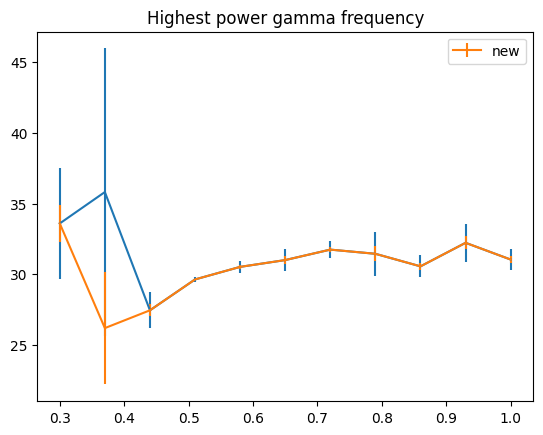

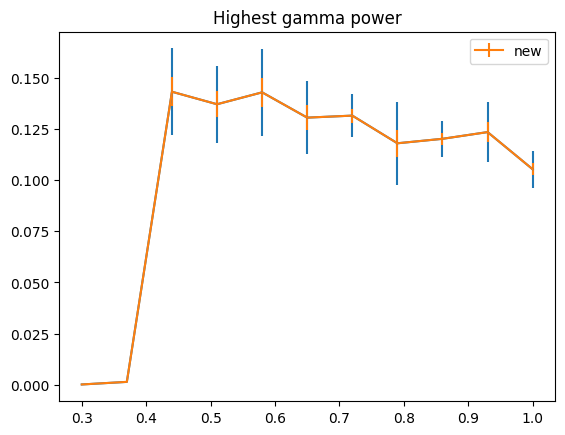

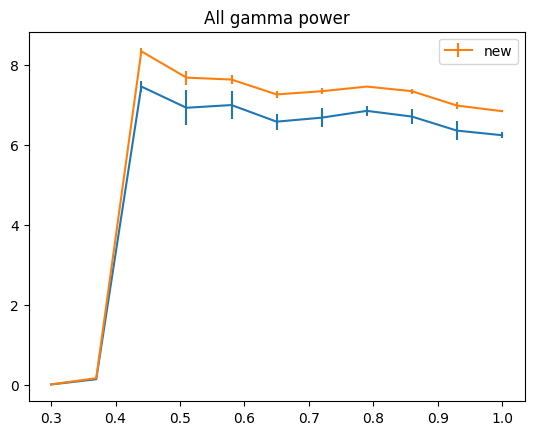

In [39]:
#I = np.linspace(0.4,0.56,len(freq))
plt.errorbar(I,freq,f_std)
#plt.show()
plt.errorbar(I,np.array(avg_p)[:,0],np.array(std_p)[:,0],label="new")
plt.legend()
plt.title("Highest power gamma frequency")
plt.show()
plt.errorbar(I,pow,p_std)

plt.errorbar(I,np.array(avg_p)[:,1],np.array(std_p)[:,1],label="new")
plt.legend()
plt.title("Highest gamma power")
plt.show()
plt.errorbar(I,pow_gamma,pow_gamma_std)
plt.errorbar(I,np.array(avg_p)[:,2],np.array(std_p)[:,2],label="new")
plt.legend()
plt.title("All gamma power")
plt.show()

In [36]:
obj = Plot(['exc1.r'], t_start=1, t_end=20, title='Exc 1 Firing Rate')
t_t, traces = obj.get_traces(t, res)
s = traces[0]
dt = t[1]-t[0]
N = len(s)
yf = fft(s)
xf = fftfreq(N, dt)[:N//2]
yf = yf[0:N//2]
limit = np.where((xf<=50)& (xf>=1))
x_new= xf[limit]
y_new = 2.0/N * np.abs(yf[limit])
# max_ind = np.argmax(y_new)
# max_freq = x_new[max_ind]
# max_freq_power = y_new[max_ind]
# power_gamma_range = sum(y_new)
print(obj.max_gamma_power(t, res))
x,y=spectrogram(t,res,t_start=1)
print(max_gamma_power(x_new,y_new))
print(max_gamma_power(x,y))

(30.331648241764345, 0.0969662425492754, 6.442483135281644)
(30.331648241764345, 0.0969662425492754, 7.023082780265899)
(30.331648241764345, 0.0969662425492754, 7.023082780265899)


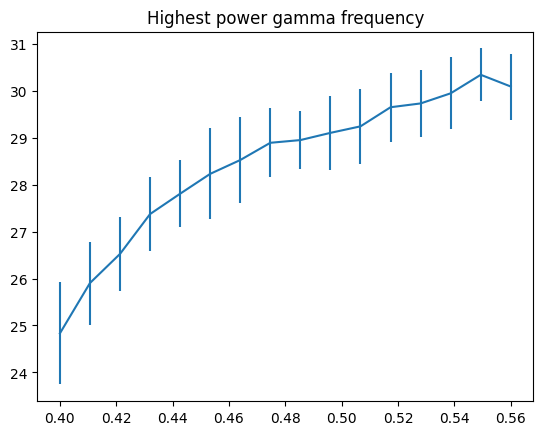

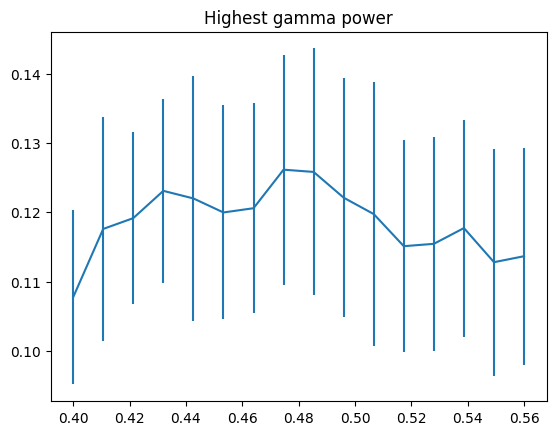

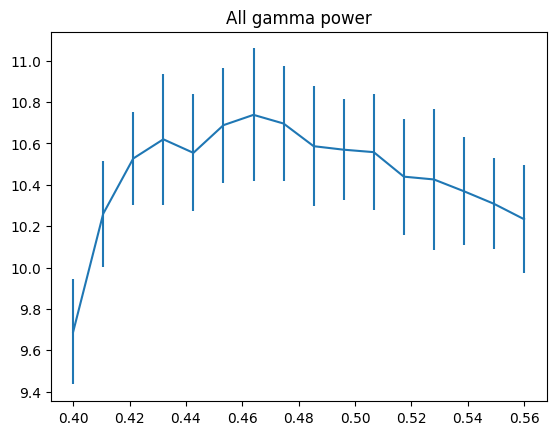

In [43]:
#I = np.linspace(0.4,0.56,len(freq))
plt.errorbar(I,freq,f_std)
plt.title("Highest power gamma frequency")
plt.show()
plt.errorbar(I,pow,p_std)
plt.title("Highest gamma power")
plt.show()
plt.errorbar(I,pow_gamma,pow_gamma_std)
plt.title("All gamma power")
plt.show()

In [46]:
direc = "./src/dataaa/"
f = np.load(direc+"f.npy" )
fs = np.load(direc+"fs.npy")
p = np.load(direc+"p.npy")
ps = np.load(direc+"ps.npy" )
pg = np.load(direc+"pg.npy")
pgs= np.load(direc+"pgs.npy")

f  = np.append(f  , freq,axis = None)
fs = np.append(fs , f_std,axis = None)
p  = np.append(p  , pow,axis = None)
ps = np.append(ps , p_std,axis = None)
pg = np.append(pg , pow_gamma,axis = None)
pgs= np.append(pgs, pow_gamma_std,axis = None)



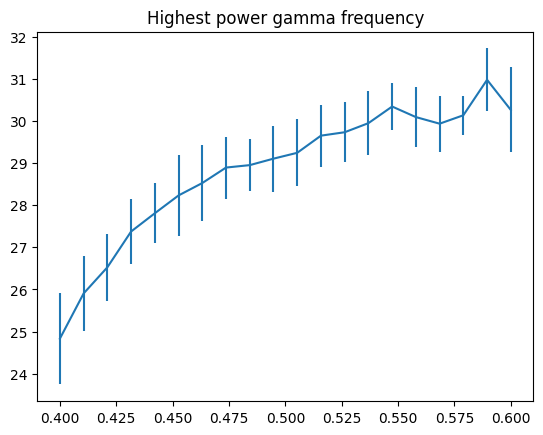

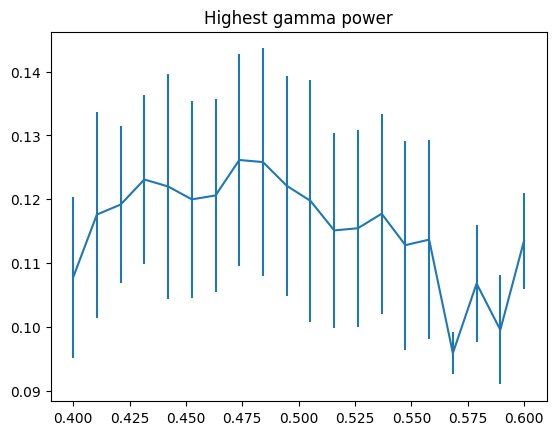

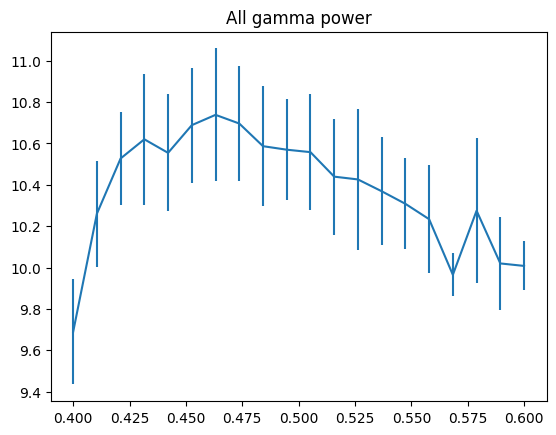

In [47]:
I = np.linspace(0.4,0.6,20)
plt.errorbar(I,f,fs/50)
plt.title("Highest power gamma frequency")
plt.show()
plt.errorbar(I,p,ps/50)
plt.title("Highest gamma power")
plt.show()
plt.errorbar(I,pg,pgs/50)
plt.title("All gamma power")
plt.show()

In [29]:
direc = "./src/dataaa/" + "f.npy"
f=np.load(direc)

In [43]:
f = np.load(direc+"f.npy" )
len(f)

16

In [41]:
I=np.linspace(0.4,0.6,21)
print(I)

[0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6 ]


In [44]:
I = np.linspace(0.4,0.56,len(f))
print(I)

[0.4    0.4107 0.4213 0.432  0.4427 0.4533 0.464  0.4747 0.4853 0.496  0.5067 0.5173 0.528  0.5387 0.5493 0.56  ]
